In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import torch
import logging
logging.basicConfig(level=logging.ERROR)
# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers==2.8.0

     |████████████████████████████████| 573kB 17.9MB/s 
     |████████████████████████████████| 890kB 43.8MB/s 
     |████████████████████████████████| 1.2MB 52.9MB/s 
     |████████████████████████████████| 3.7MB 52.8MB/s 
     |████████████████████████████████| 102kB 15.1MB/s 
     |████████████████████████████████| 7.2MB 51.9MB/s 
     |████████████████████████████████| 71kB 11.7MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=40ede09eff4d1c2babf5c06b394dcacce2fb62436c7e1d2d0d8e148f32fe3510
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
  Created wheel for boto3: filename=boto3-1.17.12-py2.py3-none-any.whl size=128775 sha256=c70408932f6b9c866e46aca90e29e8560e10d1c0b26a996ceb67f59afab93ae5
  Stored in directory: /root/.cache/pip/wheels/53/00/be/27e37811c37fe384b780ce89ce3b8e021493b1ab7d19fa71ef
Successfully built sacremoses boto3
ERROR: botocore 1.20.12 has requirement url

In [ ]:
!pip install tensorflow==1.13.1

     |████████████████████████████████| 92.5MB 46kB/s 
     |████████████████████████████████| 3.2MB 49.5MB/s 
     |████████████████████████████████| 51kB 9.7MB/s 
     |████████████████████████████████| 368kB 54.2MB/s 
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [ ]:
#Preprocessing script required for first time

!cp "/content/drive/MyDrive/Information_retrieval_project/khan_acad/khan_acad_ir_project.csv" /content

In [ ]:
import re
def clean_sentence(question):
  # print(question)
  question = re.sub('<[^>]*>', ' ',question)
  question = re.sub(' +', ' ', question)
  question = re.sub('\xa0','',question)
  question = question.rstrip()
  question = re.sub('nan','',question)
  question = re.sub(u'\u2004','',question)
  question = re.sub(u'\u2009','',question)
  question = re.sub("Voiceover:","",question)
  question = re.sub("•","",question)
  question = re.sub("\d:\d\d","",question)

  question = re.sub("\[Voiceover\]","",question)
  question = re.sub("\[Instructor\]","",question)
  question = re.sub("\[Narrator\]","",question)

  # question = question.decode("utf-8")
  # question = question.replace(u'\u200\d*','').encode("utf-8")
  question = re.sub('&nbsp','',question)
  question = re.sub('&ndash','',question)
  question = re.sub('\r','',question)
  question = re.sub('\t','',question)
  question = re.sub('\n',' ',question)

  question = re.sub('MathType@.*','',question)
  question = re.sub('&thinsp','',question)
  question = re.sub('&times','',question)
  question = re.sub('\u200b','',question)
  question = re.sub('&rarr;;;','',question)

  return question

In [ ]:
import pandas as pd
data = pd.read_csv("khan_acad_ir_project.csv")
data
output = data["video_transcripts"].apply(lambda x: clean_sentence(x))
data["video_transcripts"] = output
data = data[["video_transcripts","hierarchy"]]
data

,video_transcripts,hierarchy
0,Here's an example of a nucleophilic addition...,science>>organic-chemistry>>aldehydes-ketones
1,"In the previous video, we saw how to make hy...",science>>organic-chemistry>>aldehydes-ketones
2,We've already seen how to form hydrates and ...,science>>organic-chemistry>>aldehydes-ketones
3,"If we react an aldehyde, or a ketone, with a...",science>>organic-chemistry>>aldehydes-ketones
4,We've already seen how to form acetals. If w...,science>>organic-chemistry>>aldehydes-ketones
...,...,...
6154,"- Let's multiply 40 times 70. So 40 times, w...",math>>arithmetic-home>>multiply-divide
6155,"- Let's talk about multiplying by 10, 100, a...",math>>arithmetic-home>>multiply-divide
6156,When we were first exposed to multiplication ...,math>>arithmetic-home>>arith-review-fractions
6157,My wife and I have recently purchased an asso...,math>>arithmetic-home>>arith-review-fractions


In [ ]:
from sklearn.model_selection import train_test_split
train,val = train_test_split(data,test_size=0.15)

In [ ]:
train,test = train_test_split(train,test_size=0.20)

In [ ]:
val

,video_transcripts,hierarchy
2111,Find the probability of rolling doubles on tw...,math>>precalculus>>x9e81a4f98389efdf:prob-comb
1633,"After the food is swallowed, it leaves the m...",science>>health-and-medicine>>human-anatomy-an...
5365,Let's now talk about what is easily one of th...,math>>geometry>>hs-geo-trig
2517,The goal in this video is to essentially prov...,science>>chemistry>>thermodynamics-chemistry
3665,"A line goes through the points (-1, 6) and (5...",math>>in-in-grade-11-ncert>>in-in-class11-stra...
...,...,...
2465,- As long as human beings have been around I...,science>>ap-biology>>gene-expression-and-regul...
5214,Let's see if we can multiply 9 times 0.6. Or ...,math>>6th-engage-ny>>engage-6th-module-2
5480,- So let's say that we have y is equal to th...,math>>calculus-all-old>>taking-derivatives-calc
5600,- What I want to do in this video is see if ...,math>>old-ap-calculus-ab>>ab-accumulation-riem...


In [ ]:
train

,video_transcripts,hierarchy
166,In the last couple of videos we saw that we c...,math>>multivariable-calculus>>multivariable-de...
3556,- What we're going to do in this video is gi...,science>>ap-biology>>natural-selection
5435,"So once again, we have three equal, or we say...",math>>pre-algebra>>pre-algebra-equations-expre...
2184,- Liz's math test included a survey question...,math>>engageny-alg-1>>alg1-2
5848,- The following two equations form a linear s...,math>>algebra-home>>alg-system-of-equations
...,...,...
1498,- Hello everyone. So this is what I might ca...,math>>multivariable-calculus>>multivariable-de...
4886,- Let's try now to subtract some two-digit n...,math>>early-math>>cc-early-math-add-sub-100
5371,- Let's say that I have a circle. My best att...,math>>engageny-geo>>geo-5
5247,- So let's look at the female reproductive cy...,science>>health-and-medicine>>human-anatomy-an...


In [ ]:
test

,video_transcripts,hierarchy
5576,- What I hope to do in this video is get fam...,math>>math1>>x89d82521517266d4:functions
4317,In the last video we were able to set up this...,math>>old-ap-calculus-ab>>ab-applications-defi...
3261,- In previous videos we talk about GDP as th...,economics-finance-domain>>ap-macroeconomics>>e...
2342,- So what we're gonna do in this video is se...,math>>old-integral-calculus>>definite-integral...
3892,- So I've said that if you have a vector fie...,math>>multivariable-calculus>>multivariable-de...
...,...,...
439,"In the last video, we saw that if a vector fi...",math>>multivariable-calculus>>integrating-mult...
3733,So I have the function g of x is equal to 9 t...,math>>algebra-home>>alg-sequences
2767,Let's see if we can get a little bit more pra...,science>>in-in-class11th-physics>>in-in-system...
4802,Find the probability of rolling even numbers ...,math>>precalculus>>x9e81a4f98389efdf:prob-comb


In [ ]:
train.to_csv("train_khan_acad.csv",index=False)
test.to_csv("test_khan_acad.csv",index=False)
val.to_csv("val_khan_acad.csv",index=False)

In [ ]:
!cp train_khan_acad.csv "/content/drive/MyDrive/Information_retrieval_project/khan_acad/"
!cp test_khan_acad.csv "/content/drive/MyDrive/Information_retrieval_project/khan_acad/"
!cp val_khan_acad.csv "/content/drive/MyDrive/Information_retrieval_project/khan_acad/"

In [ ]:
!cp "/content/drive/MyDrive/Information_retrieval_project/QC_science/train_khan_acad.csv" /content
!cp "/content/drive/MyDrive/Information_retrieval_project/QC_science/test_khan_acad.csv" /content
!cp "/content/drive/MyDrive/Information_retrieval_project/QC_science/val_khan_acad.csv" /content


In [ ]:
import pandas as pd
train_data = pd.read_csv("train_khan_acad.csv")
test_data = pd.read_csv("test_khan_acad.csv")
val_data = pd.read_csv("val_khan_acad.csv")
train_data


,video_transcripts,hierarchy
0,In the last couple of videos we saw that we c...,math>>multivariable-calculus>>multivariable-de...
1,- What we're going to do in this video is gi...,science>>ap-biology>>natural-selection
2,"So once again, we have three equal, or we say...",math>>pre-algebra>>pre-algebra-equations-expre...
3,- Liz's math test included a survey question...,math>>engageny-alg-1>>alg1-2
4,- The following two equations form a linear s...,math>>algebra-home>>alg-system-of-equations
...,...,...
4183,- Hello everyone. So this is what I might ca...,math>>multivariable-calculus>>multivariable-de...
4184,- Let's try now to subtract some two-digit n...,math>>early-math>>cc-early-math-add-sub-100
4185,- Let's say that I have a circle. My best att...,math>>engageny-geo>>geo-5
4186,- So let's look at the female reproductive cy...,science>>health-and-medicine>>human-anatomy-an...


In [ ]:
from google.colab import files

In [ ]:
train_data["hierarchy"].value_counts()

science>>health-and-medicine>>circulatory-system-diseases             99
science>>health-and-medicine>>human-anatomy-and-physiology            65
science>>health-and-medicine>>respiratory-system-diseases             55
science>>health-and-medicine>>circulatory-system                      54
science>>health-and-medicine>>infectious-diseases                     52
                                                                      ..
math>>algebra-basics>>alg-basics-expressions-with-exponents            1
science>>ap-physics-1>>ap-one-dimensional-motion                       1
math>>precalculus>>x9e81a4f98389efdf:vectors                           1
math>>4th-grade-foundations-engageny>>4th-m5-engage-ny-foundations     1
math>>old-ap-calculus-ab>>ab-derivatives-advanced                      1
Name: hierarchy, Length: 569, dtype: int64

In [ ]:
# final_data_1 = final_data.loc[0:71003,:]
# final_data_1

In [ ]:
!mv model_save_categorized_reduced_khan_acad "/content/drive/MyDrive/Information_retrieval_project/khan_acad/"

In [ ]:
!cp -r "/content/drive/My Drive/research_lo_content_taxonomy_classification/model_save_categorized_reduced_nov" /content/

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

Loading BERT tokenizer...


In [ ]:
test_data["hierarchy"].value_counts()

science>>health-and-medicine>>human-anatomy-and-physiology    24
science>>health-and-medicine>>circulatory-system-diseases     22
science>>health-and-medicine>>circulatory-system              17
math>>algebra-home>>alg-polynomials                           11
science>>biology>>crash-course-bio-ecology                    11
                                                              ..
math>>ap-statistics>>inference-slope-linear-regression         1
science>>physics>>thermodynamics                               1
math>>old-integral-calculus>>indefinite-integrals              1
math>>ap-calculus-ab>>ab-limits-new                            1
science>>chemistry>>chemical-bonds                             1
Name: hierarchy, Length: 416, dtype: int64

In [ ]:

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
LE.fit_transform(pd.concat([train_data['hierarchy'],test_data['hierarchy']]))
train_data['label'] = LE.transform(train_data['hierarchy'])
train_data.head()

,video_transcripts,hierarchy,label
0,In the last couple of videos we saw that we c...,math>>multivariable-calculus>>multivariable-de...,354
1,- What we're going to do in this video is gi...,science>>ap-biology>>natural-selection,422
2,"So once again, we have three equal, or we say...",math>>pre-algebra>>pre-algebra-equations-expre...,384
3,- Liz's math test included a survey question...,math>>engageny-alg-1>>alg1-2,231
4,- The following two equations form a linear s...,math>>algebra-home>>alg-system-of-equations,99


In [ ]:
def get_labels(prediction):
    predicted_label =  LE.inverse_transform([prediction])
    return predicted_label[0]

In [ ]:
get_labels(204)

'math>>cc-seventh-grade-math>>cc-7th-fractions-decimals'

In [ ]:
train_data.iloc[14,1]

'economics-finance-domain>>macroeconomics>>monetary-system-topic'

In [ ]:
train_data

,video_transcripts,hierarchy,label
0,In the last couple of videos we saw that we c...,math>>multivariable-calculus>>multivariable-de...,354
1,- What we're going to do in this video is gi...,science>>ap-biology>>natural-selection,422
2,"So once again, we have three equal, or we say...",math>>pre-algebra>>pre-algebra-equations-expre...,384
3,- Liz's math test included a survey question...,math>>engageny-alg-1>>alg1-2,231
4,- The following two equations form a linear s...,math>>algebra-home>>alg-system-of-equations,99
...,...,...,...
4183,- Hello everyone. So this is what I might ca...,math>>multivariable-calculus>>multivariable-de...,354
4184,- Let's try now to subtract some two-digit n...,math>>early-math>>cc-early-math-add-sub-100,226
4185,- Let's say that I have a circle. My best att...,math>>engageny-geo>>geo-5,240
4186,- So let's look at the female reproductive cy...,science>>health-and-medicine>>human-anatomy-an...,497


In [ ]:
# LE_test = LabelEncoder()

test_data['label'] = LE.transform(test_data['hierarchy'])
test_data.head()

,video_transcripts,hierarchy,label
0,- What I hope to do in this video is get fam...,math>>math1>>x89d82521517266d4:functions,335
1,In the last video we were able to set up this...,math>>old-ap-calculus-ab>>ab-applications-defi...,357
2,- In previous videos we talk about GDP as th...,economics-finance-domain>>ap-macroeconomics>>e...,3
3,- So what we're gonna do in this video is se...,math>>old-integral-calculus>>definite-integral...,378
4,- So I've said that if you have a vector fie...,math>>multivariable-calculus>>multivariable-de...,354


In [ ]:
val_data['label'] = LE.transform(val_data['hierarchy'])
val_data.head()

,video_transcripts,hierarchy,label
0,Find the probability of rolling doubles on tw...,math>>precalculus>>x9e81a4f98389efdf:prob-comb,395
1,"After the food is swallowed, it leaves the m...",science>>health-and-medicine>>human-anatomy-an...,497
2,Let's now talk about what is easily one of th...,math>>geometry>>hs-geo-trig,256
3,The goal in this video is to essentially prov...,science>>chemistry>>thermodynamics-chemistry,472
4,"A line goes through the points (-1, 6) and (5...",math>>in-in-grade-11-ncert>>in-in-class11-stra...,304


In [ ]:
train_features, test_features, train_labels, test_labels = train_data["video_transcripts"],test_data["video_transcripts"],train_data["label"],test_data["label"]
val_features,val_labels = val_data["video_transcripts"], val_data["label"]

In [ ]:
train_labels.value_counts()

489    99
497    65
505    55
488    54
498    52
       ..
382     1
359     1
195     1
471     1
216     1
Name: label, Length: 569, dtype: int64

In [ ]:
test_labels.value_counts()

497    24
489    22
488    17
93     11
485    11
       ..
192     1
191     1
398     1
187     1
291     1
Name: label, Length: 416, dtype: int64

In [ ]:
get_labels(268)

'math>>in-in-class-3rd-math-cbse>>x80b2f4aa70819288:represent-and-interpret-data'

In [ ]:
question_answer = train_features.values
categories = train_labels.values

In [ ]:
question_answer

array([" In the last couple of videos we saw that we can describe a curves by a position vector-valued function. And in very general terms, it would be the x position as a function of time times the unit vector in the horizontal direction. Plus the y position as a function of time times the unit victor in the vertical direction. And this will essentially describe this-- though, if you can imagine a particle and let's say the parameter t represents time. It'll describe where the particle is at any given time. And if we wanted a particular curve we can say, well, this only applies for some curve-- we're dealing, it's r of t. And it's only applicable between t being greater than a and less than b. And you know, that would describe some curve in two dimensions. Just me just draw it here. This is all a review of really, the last two videos. So this curve, it might look something like that where this is where t is equal to a. That's where t is equal to b. And so r of a will be this vector ri

In [ ]:
len(categories)

4188

In [ ]:
input_ids = []
attention_masks = []

for sent in question_answer:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 256,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)


# Print sentence 0, now as a list of IDs.
print('Original: ', question_answer[0])
print('Token IDs:', input_ids[0])

Original:   In the last couple of videos we saw that we can describe a curves by a position vector-valued function. And in very general terms, it would be the x position as a function of time times the unit vector in the horizontal direction. Plus the y position as a function of time times the unit victor in the vertical direction. And this will essentially describe this-- though, if you can imagine a particle and let's say the parameter t represents time. It'll describe where the particle is at any given time. And if we wanted a particular curve we can say, well, this only applies for some curve-- we're dealing, it's r of t. And it's only applicable between t being greater than a and less than b. And you know, that would describe some curve in two dimensions. Just me just draw it here. This is all a review of really, the last two videos. So this curve, it might look something like that where this is where t is equal to a. That's where t is equal to b. And so r of a will be this vector

In [ ]:
input_ids_val = []
attention_masks_val = []

for sent in val_features:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 256,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids_val.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks_val.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids_val = torch.cat(input_ids_val, dim=0)
attention_masks_val = torch.cat(attention_masks_val, dim=0)


# Print sentence 0, now as a list of IDs.
print('Original: ', question_answer[0])
print('Token IDs:', input_ids[0])

Original:   In the last couple of videos we saw that we can describe a curves by a position vector-valued function. And in very general terms, it would be the x position as a function of time times the unit vector in the horizontal direction. Plus the y position as a function of time times the unit victor in the vertical direction. And this will essentially describe this-- though, if you can imagine a particle and let's say the parameter t represents time. It'll describe where the particle is at any given time. And if we wanted a particular curve we can say, well, this only applies for some curve-- we're dealing, it's r of t. And it's only applicable between t being greater than a and less than b. And you know, that would describe some curve in two dimensions. Just me just draw it here. This is all a review of really, the last two videos. So this curve, it might look something like that where this is where t is equal to a. That's where t is equal to b. And so r of a will be this vector

In [ ]:
print('Original: ', question_answer[1])
print('Token IDs:', input_ids[1])

Original:   -  What we're going to do in this video is give ourselves a little bit of a tour of eukaryotic cells. And the first place to start is just to remind ourselves what it means for a cell to be eukaryotic. It means that inside the cell, there are membrane-bound organelles. Now, what does that mean? Well, you could view it as sub-compartments within the cell. Membrane-bound organelles. And in this video in particular, we're going to highlight some of these membrane-bound organelles that make the cells eukaryotic. So let's just start with some of the ingredients that we know is true of all cells. So you'll have your cellular membrane here. I drew it big, so that we have a lot of space to draw things in. So this is our cellular membrane. I'll do some nice shading so you appreciate that it'll actually be three-dimensional. We see so many slices of cells that sometimes we forget that they are more spherical, or that they have three-dimensional shape to them. They're not all spherica

In [ ]:
labels = torch.tensor(categories)

In [ ]:
get_labels(419)

'science>>ap-biology>>ecology-ap'

In [ ]:
get_labels(311)

'math>>in-in-grade-12-ncert>>in-in-determinants'

In [ ]:
num_classes = len(list(set(categories)))
num_classes

569

In [ ]:
from torch.utils.data import TensorDataset, random_split
# train_poincare_tensor = torch.tensor(poincare_embeddings_final,dtype=torch.float)
# train_poincare_tensor = torch.tensor(poincare_embeddings_final_train,dtype=torch.float)
# val_poincare_tensor = torch.tensor(poincare_embeddings_final_val, dtype=torch.float)
train_labels = torch.tensor(categories)
val_labels = torch.tensor(val_labels.values)
# Combine the training inputs into a TensorDataset.
train_dataset = TensorDataset(input_ids, attention_masks, train_labels)
val_dataset = TensorDataset(input_ids_val,attention_masks_val,val_labels)


In [ ]:
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size = 32
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), 
            batch_size = batch_size 
        )

In [ ]:
get_labels(571)

'science>>physics>>work-and-energy'

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig
# run this cell when training model
# Loads BertForSequenceClassification, the pretrained BERT model with a single 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 572,   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:

# run this cell to prepare model for inference
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Loads BertForSequenceClassification, the pretrained BERT model with a single 
model = BertForSequenceClassification.from_pretrained(
    "model_save_categorized_reduced_QC", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 420,   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = True, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
#freeze few layers for better training
for param in model.bert.encoder.layer[0:6].parameters():
    param.requires_grad=False
for param in model.bert.embeddings.parameters():
    param.requires_grad=False


In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [ ]:
from transformers import get_linear_schedule_with_warmup


epochs = 30

# Total number of training steps is [number of batches] x [number of epochs]. 
total_steps = len(train_dataloader) * epochs



In [ ]:
len(train_dataloader) 

131

In [ ]:
1935 * 32

61920

In [ ]:
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"


In [ ]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [ ]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()
early_stopping = EarlyStopping(patience=2, verbose=True)

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0


    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))


        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()        
        # outputs prior to activation.
        loss, logits = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)


        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)


        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))


    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            (loss, logits) = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    early_stopping(avg_val_loss, model)
    if early_stopping.early_stop:
      print("Early stopping")
      break  
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))
    output_dir = 'model_save_categorized_reduced_khan_acad/'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    print("Saving model to %s" % output_dir)
    tokenizer.save_pretrained(output_dir)
    torch.save(model.state_dict(), os.path.join(output_dir, 'model_weights'))

    !rm -rf "/content/drive/My Drive/research_lo_content_taxonomy_classification/model_save_categorized_reduced_khan_acad"
    !mv model_save_categorized_reduced_khan_acad "/content/drive/My Drive/research_lo_content_taxonomy_classification/"
    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 30 ========
Training...


/usr/local/lib/python3.6/dist-packages/transformers/optimization.py:155: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  exp_avg.mul_(beta1).add_(1.0 - beta1, grad)


  Batch    40  of    131.    Elapsed: 0:00:46.
  Batch    80  of    131.    Elapsed: 0:01:29.
  Batch   120  of    131.    Elapsed: 0:02:14.

  Average training loss: 6.25
  Training epcoh took: 0:02:26

Running Validation...
  Accuracy: 0.02
Validation loss decreased (inf --> 6.087848).  Saving model ...
  Validation Loss: 6.09
  Validation took: 0:00:18
Saving model to model_save_categorized_reduced_khan_acad/

======== Epoch 2 / 30 ========
Training...
  Batch    40  of    131.    Elapsed: 0:00:45.
  Batch    80  of    131.    Elapsed: 0:01:29.
  Batch   120  of    131.    Elapsed: 0:02:13.

  Average training loss: 5.86
  Training epcoh took: 0:02:25

Running Validation...
  Accuracy: 0.08
Validation loss decreased (6.087848 --> 5.726779).  Saving model ...
  Validation Loss: 5.73
  Validation took: 0:00:18
Saving model to model_save_categorized_reduced_khan_acad/

======== Epoch 3 / 30 ========
Training...
  Batch    40  of    131.    Elapsed: 0:00:45.
  Batch    80  of    131.   

In [ ]:
# !mv model_save_categorized_reduced_freeze.zip "/content/drive/My Drive/research_lo_content_taxonomy_classification/"

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,6.25,6.09,0.02,0:02:26,0:00:18
2,5.86,5.73,0.08,0:02:25,0:00:18
3,5.50,5.42,0.10,0:02:25,0:00:18
4,5.20,5.17,0.12,0:02:25,0:00:18
5,4.94,4.94,0.15,0:02:25,0:00:18
6,4.72,4.77,0.17,0:02:25,0:00:18
7,4.52,4.62,0.18,0:02:25,0:00:18
8,4.33,4.49,0.19,0:02:25,0:00:18
9,4.17,4.37,0.19,0:02:25,0:00:18


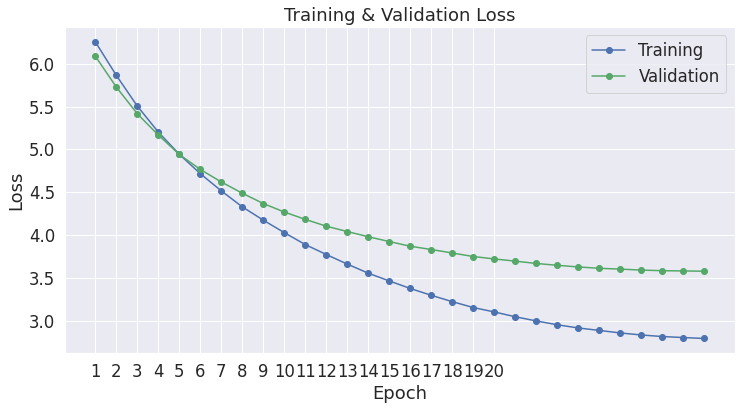

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

plt.show()

In [ ]:
import os
#no need to run during inference

output_dir = 'model_save_categorized_reduced_khan_acad/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)


model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

Saving model to model_save_categorized_reduced_khan_acad/


('model_save_categorized_reduced_khan_acad/vocab.txt',
 'model_save_categorized_reduced_khan_acad/special_tokens_map.json',
 'model_save_categorized_reduced_khan_acad/added_tokens.json')

In [ ]:
!pip install joblib
import joblib
joblib.dump(LE, "label_encoder")


['label_encoder']

In [ ]:
!zip -r model_save_categorized_reduced_khan_acad.zip model_save_categorized_reduced_khan_acad
# files.download('model_save_categorized_reduced_freeze.zip')

  adding: model_save_categorized_reduced_khan_acad/ (stored 0%)
  adding: model_save_categorized_reduced_khan_acad/tokenizer_config.json (stored 0%)
  adding: model_save_categorized_reduced_khan_acad/pytorch_model.bin (deflated 7%)
  adding: model_save_categorized_reduced_khan_acad/special_tokens_map.json (deflated 40%)
  adding: model_save_categorized_reduced_khan_acad/config.json (deflated 78%)
  adding: model_save_categorized_reduced_khan_acad/vocab.txt (deflated 53%)


In [ ]:
!zip -r label_encoder_categorized_reduced_QC.zip label_encoder
# files.download('label_encoder_categorized_reduced_round_2.zip')

updating: label_encoder (deflated 71%)
